In [5]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sph6004-assessment1-mimic-iv/Assignment_1_data.csv
/kaggle/input/mei-sph6004-pretrain-data/mei_pretrain_data.csv


# 1. Data read

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data
path = '../input/mei-sph6004-pretrain-data/'
df = pd.read_csv(path+'mei_pretrain_data.csv')
df

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,1.0,55.0,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,1.0,3.0,0.0
1,1.0,85.0,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,1.705939,1.495632,2020.00000,1.0,0.0,1.0,1.0,1.0,8.0,0.0
2,1.0,45.0,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,1.100000,1.100000,1512.26836,1.0,0.0,1.0,1.0,0.0,4.0,0.0
3,1.0,75.0,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,1.705939,1.495632,1592.00000,0.0,0.0,0.0,0.0,1.0,6.0,0.0
4,1.0,75.0,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,0.900000,0.800000,339.00000,0.0,0.0,4.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.0,85.0,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,0.600000,0.500000,697.00000,0.0,0.0,1.0,4.0,1.0,10.0,0.0
36485,0.0,35.0,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,1.705939,1.495632,2000.00000,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36486,0.0,65.0,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,1.705939,1.495632,1512.26836,0.0,0.0,1.0,0.0,0.0,3.0,0.0
36487,1.0,75.0,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,1.705939,1.495632,1900.00000,0.0,0.0,0.0,1.0,0.0,5.0,0.0


In [7]:
df.describe()

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_total_max,bilirubin_total_min,urineoutput,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
count,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,...,36489.000000,36489.000000,36489.000000,36489.00000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000,36489.000000
mean,0.544822,65.995368,70.935003,103.109572,84.855578,60.431578,105.481843,79.256223,94.454735,147.677286,...,1.705939,1.495632,1512.268360,0.47776,0.261915,1.060237,0.914906,0.826002,5.798104,0.036422
std,0.497994,17.116974,15.049239,20.662520,15.961682,13.333521,23.320004,11.745911,16.679284,22.796128,...,2.926152,2.649308,650.843086,0.82313,0.734331,0.971356,1.050688,1.201319,3.014789,0.187340
min,0.000000,15.000000,9.000000,36.000000,28.500000,0.830000,51.000000,42.513889,2.000000,49.000000,...,0.100000,0.100000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,55.000000,60.000000,88.000000,73.347826,53.000000,91.000000,70.916667,84.000000,132.000000,...,0.600000,0.600000,1090.000000,0.00000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,65.000000,70.000000,101.000000,83.541667,60.000000,102.000000,77.880000,93.000000,146.000000,...,1.705939,1.495632,1512.268360,0.00000,0.000000,1.000000,1.000000,0.000000,6.000000,0.000000
75%,1.000000,75.000000,80.000000,115.000000,95.230769,68.000000,115.000000,86.363636,104.000000,161.000000,...,1.705939,1.495632,1900.000000,1.00000,0.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1.000000,105.000000,163.000000,295.000000,174.740741,133.000000,299.000000,151.529412,184.000000,335.000000,...,78.000000,67.800000,3000.000000,4.00000,4.000000,4.000000,4.000000,4.000000,20.000000,1.000000


In [8]:
# df.info()

# 2. Explore Data Analysis (EDA)
## 👉🏻 Please go to mei-sph6004-part 1

# 3. Feature Engineering 

In [9]:
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

print(X.shape)
print(y.shape)


(36489, 46)
(36489,)


## 3.1 Data Preprocessing

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = StandardScaler().fit_transform(X)

## 3.2 Data split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 3.3 SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# oversampling/undersampling
X_train, y_train = smote.fit_resample(X_train, y_train)

# 4. Baseline of Random Forest

In [13]:
# Load Data Modelling Libraries
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


## 4.1 Model Training

In [14]:
from sklearn.model_selection import cross_validate, KFold, train_test_split, GridSearchCV

In [16]:
# 实例化RandomForestClassifier
rfc = RandomForestClassifier()

# 定义参数空间
param_grid_rfc = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'random_state':[42]
}

# 定义网格搜索
grid_search_rfc = GridSearchCV(
    rfc,
    param_grid=param_grid_rfc,
    scoring=['recall','f1','accuracy','roc_auc'],
    refit='recall',
    cv=5,
    n_jobs=-1,
    verbose=10
)

start = time()
# 进行网格搜索
grid_search_rfc.fit(X_train, y_train)

end = time()
print(f"took { str(end - start)[:7] } seconds")

# 输出最优参数和最优得分
print(f"Best parameters: {grid_search_rfc.best_params_}")
print(f"Best Recall scores: {grid_search_rfc.best_score_}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 4/5; 1/192] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42
[CV 4/5; 1/192] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, random_state=42; accuracy: (test=0.984) f1: (test=0.984) recall: (test=0.988) roc_auc: (test=0.999) total time=   3.7s
[CV 1/5; 2/192] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42
[CV 1/5; 2/192] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42; accuracy: (test=0.962) f1: (test=0.961) recall: (test=0.935) roc_auc: (test=0.995) total time=  18.7s
[CV 5/5; 2/192] START criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, random_state=42


In [17]:
# 对测试集进行预测
y_pred_rfc = grid_search_rfc.best_estimator_.predict(X_test)

# # 输出评价指标
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Recall:", recall_score(y_test, y_pred_rfc))
print("F1-score:", f1_score(y_test, y_pred_rfc))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rfc))
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)

Random Forest Classifier:
Accuracy: 0.9569745135653603
Precision: 0.2459016393442623
Recall: 0.053003533568904596
F1-score: 0.0872093023255814
ROC AUC: 0.5232230782598621


## 4.2 Confusion Matrix

Text(50.722222222222214, 0.5, 'True')

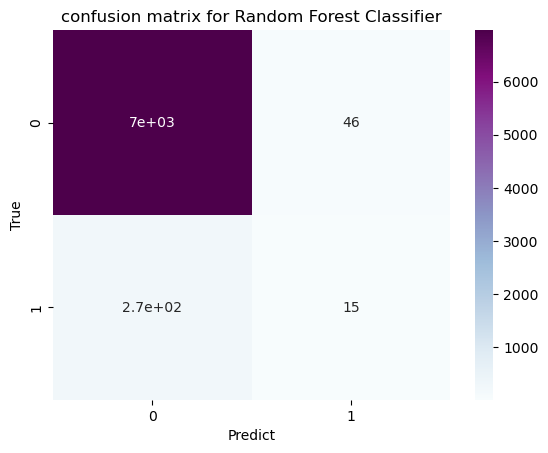

In [18]:
from sklearn.metrics import confusion_matrix

cm_rfc= confusion_matrix(y_test, y_pred_rfc, labels=[0, 1])

fig, ax =plt.subplots()

sns.heatmap(cm_rfc,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix for Random Forest Classifier')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [19]:
feature_list = df.columns[:-1]
print('feature_list:',feature_list)

importances = list(grid_search_rfc.best_estimator_.feature_importances_)
importances

feature_list: Index(['gender', 'age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'lactate_min', 'lactate_max', 'ph_min', 'ph_max',
       'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max', 'creatinine_min',
       'creatinine_max', 'hemoglobin_min', 'hemoglobin_max', 'pt_min',
       'pt_max', 'alt_max', 'alt_min', 'alp_max', 'alp_min', 'ast_min',
       'ast_max', 'bilirubin_total_max', 'bilirubin_total_min', 'urineoutput',
       'sofa_coagulation', 'sofa_liver', 'sofa_cardiovascular', 'sofa_cns',
       'sofa_renal', 'charlson_comorbidity_index'],
      dtype='object')


[0.014548517478481076,
 0.043182390827191414,
 0.012734718263367893,
 0.013809350573868596,
 0.012782789330468964,
 0.012234446489107322,
 0.012149610024360866,
 0.011942981211444109,
 0.011976020950476755,
 0.012969034963233326,
 0.012049983411070353,
 0.011887642703639676,
 0.012351658122536819,
 0.012188031559258482,
 0.01476449991573261,
 0.013809781993074716,
 0.013083286455566947,
 0.026256345137192584,
 0.02545634914368887,
 0.023442972629519856,
 0.02197964335462542,
 0.012780547412873456,
 0.013538070727368614,
 0.01444802845316468,
 0.01539329285625307,
 0.016413434687374863,
 0.019757557642890233,
 0.013364301020553334,
 0.012019645563283882,
 0.014034414720281656,
 0.01507327152417575,
 0.03411850018537297,
 0.02515554969706657,
 0.019948390749830104,
 0.01699627164012325,
 0.024373909471393146,
 0.03298080136452393,
 0.030117552966738098,
 0.029058027956116905,
 0.02663207058434981,
 0.017414033476655485,
 0.01091511287380912,
 0.00815047390190279,
 0.18521302012892205,
 0

## 4.3 Feature Importances

In [20]:
# Dictionaries with variable and importance
feature_importances = {feature:round(importance, 2) for feature, importance in zip(feature_list, importances)}

feature_importances

{'gender': 0.01,
 'age': 0.04,
 'heart_rate_min': 0.01,
 'heart_rate_max': 0.01,
 'heart_rate_mean': 0.01,
 'mbp_min': 0.01,
 'mbp_max': 0.01,
 'mbp_mean': 0.01,
 'sbp_min': 0.01,
 'sbp_max': 0.01,
 'sbp_mean': 0.01,
 'dbp_min': 0.01,
 'dbp_max': 0.01,
 'dbp_mean': 0.01,
 'temperature_min': 0.01,
 'temperature_max': 0.01,
 'temperature_mean': 0.01,
 'lactate_min': 0.03,
 'lactate_max': 0.03,
 'ph_min': 0.02,
 'ph_max': 0.02,
 'glucose_min': 0.01,
 'glucose_max': 0.01,
 'wbc_min': 0.01,
 'wbc_max': 0.02,
 'creatinine_min': 0.02,
 'creatinine_max': 0.02,
 'hemoglobin_min': 0.01,
 'hemoglobin_max': 0.01,
 'pt_min': 0.01,
 'pt_max': 0.02,
 'alt_max': 0.03,
 'alt_min': 0.03,
 'alp_max': 0.02,
 'alp_min': 0.02,
 'ast_min': 0.02,
 'ast_max': 0.03,
 'bilirubin_total_max': 0.03,
 'bilirubin_total_min': 0.03,
 'urineoutput': 0.03,
 'sofa_coagulation': 0.02,
 'sofa_liver': 0.01,
 'sofa_cardiovascular': 0.01,
 'sofa_cns': 0.19,
 'sofa_renal': 0.02,
 'charlson_comorbidity_index': 0.02}

In [21]:
# Sort the feature importances in decreasing order
feature_importances = sorted(feature_importances.items(), key = lambda x: x[1], reverse = True)

# # Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sofa_cns             Importance: 0.19
Variable: age                  Importance: 0.04
Variable: lactate_min          Importance: 0.03
Variable: lactate_max          Importance: 0.03
Variable: alt_max              Importance: 0.03
Variable: alt_min              Importance: 0.03
Variable: ast_max              Importance: 0.03
Variable: bilirubin_total_max  Importance: 0.03
Variable: bilirubin_total_min  Importance: 0.03
Variable: urineoutput          Importance: 0.03
Variable: ph_min               Importance: 0.02
Variable: ph_max               Importance: 0.02
Variable: wbc_max              Importance: 0.02
Variable: creatinine_min       Importance: 0.02
Variable: creatinine_max       Importance: 0.02
Variable: pt_max               Importance: 0.02
Variable: alp_max              Importance: 0.02
Variable: alp_min              Importance: 0.02
Variable: ast_min              Importance: 0.02
Variable: sofa_coagulation     Importance: 0.02
Variable: sofa_renal           Importanc

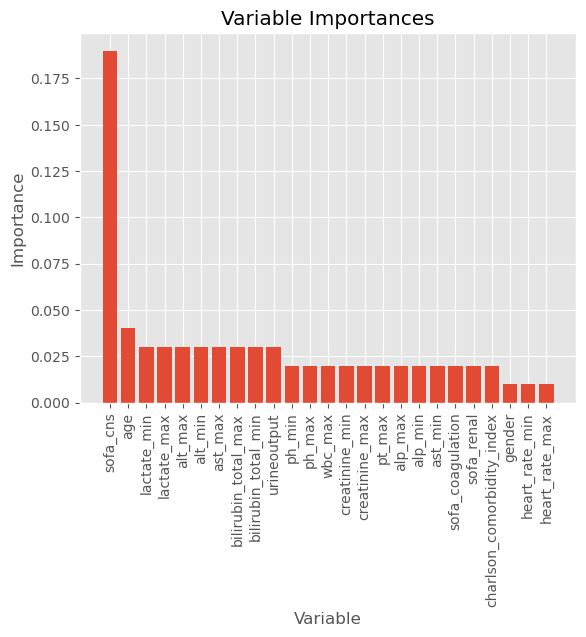

In [22]:
plt.style.use('ggplot')

top = 25
# the x axis for the plot 
x_axis = [i for i in range(top)]
plot_importance = feature_importances[:top]

# Creat a bar plot 
plt.bar(x_axis, [i[1] for i in plot_importance], orientation = 'vertical')
# Define xtick labels 
plt.xticks(x_axis, [i[0] for i in plot_importance], rotation='vertical')
# Define axis labels and titles
plt.ylabel('Importance'); 
plt.xlabel('Variable'); 
plt.title('Variable Importances');

# 5. Model optimization 

## 5.1 Feature Select

### Genetic Algorithm (GA)

In [23]:
!pip install sklearn-genetic

In [24]:
from genetic_selection import GeneticSelectionCV

[CV 1/5; 182/192] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42; accuracy: (test=0.899) f1: (test=0.894) recall: (test=0.857) roc_auc: (test=0.967) total time=  13.2s
[CV 4/5; 182/192] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42
[CV 4/5; 182/192] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42; accuracy: (test=0.938) f1: (test=0.939) recall: (test=0.948) roc_auc: (test=0.987) total time=  13.2s
[CV 2/5; 183/192] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42
[CV 2/5; 183/192] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42; accuracy: (test=0.936) f1: (test=0.937) recall:

In [26]:
from genetic_selection import GeneticSelectionCV


estimator = RandomForestClassifier(
    n_estimators= 200,
    max_depth= None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    criterion='gini',
    random_state=42,
)
    
    
GA_model = GeneticSelectionCV(
    estimator, 
    cv=5, 
    verbose=10,
    scoring="accuracy", 
    max_features=30,
    n_population=20, 
    crossover_proba=0.5,
    mutation_proba=0.2, 
    n_generations=20,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=5, 
    n_gen_no_change=10,
    caching=True, 
    n_jobs=-1
)
GA_model = GA_model.fit(X_train, y_train)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	20    	[  0.963405  18.25       0.000133]	[ 0.000554  9.315981  0.000148]	[ 0.961577  2.        0.000053]	[  0.963688  29.         0.000627]
1  	17    	[  0.963632  25.05       0.000092]	[ 0.000035  2.906458  0.000035]	[  0.963578  18.         0.000053]	[  0.963688  29.         0.000182]
2  	9     	[  0.96366   24.8        0.000111]	[ 0.000031  2.135416  0.00004 ]	[  0.963605  22.         0.000066]	[  0.963688  28.         0.000182]
3  	4     	[  0.963688  22.85       0.000093]	[ 0.        1.589811  0.000019]	[  0.963688  21.         0.000087]	[  0.963688  27.         0.00015 ]
4  	10    	[  0.96369   21.95       0.000088]	[ 0.000012  0.589491  0.000005]	[  0.963688  21.         0.000087]	[  0.963742  24.         0.00011 ]
5  	10    	[  0.96369   22.2        0.000078]	[ 0.00003   0.87178   0.00001

In [27]:
GA_model.support_

array([False, False,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
        True, False,  True, False,  True, False, False,  True,  True,
        True, False,  True, False,  True, False, False,  True,  True,
       False])

In [28]:
ga_select_cols=[]
ga_select_cols_index=[]
for index,i in enumerate(GA_model.support_):
    if i==True:
        ga_select_cols.append(df.columns[index])
        ga_select_cols_index.append(index)
print('GA select feature columns:',ga_select_cols)

GA select feature columns: ['heart_rate_min', 'heart_rate_max', 'heart_rate_mean', 'mbp_min', 'mbp_max', 'sbp_min', 'sbp_mean', 'temperature_min', 'temperature_max', 'lactate_min', 'glucose_min', 'glucose_max', 'wbc_max', 'hemoglobin_min', 'pt_min', 'alt_max', 'alp_min', 'ast_min', 'ast_max', 'bilirubin_total_min', 'sofa_coagulation', 'sofa_cns', 'sofa_renal']


In [29]:
ga_select_cols_index

[2,
 3,
 4,
 5,
 6,
 8,
 10,
 14,
 15,
 17,
 21,
 22,
 24,
 27,
 29,
 31,
 34,
 35,
 36,
 38,
 40,
 43,
 44]

In [30]:
sub_X=X[:,ga_select_cols_index]
sub_X.shape

(36489, 23)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(sub_X, y, test_size=0.2, random_state=1)
smote = SMOTE(random_state=6004)

# oversampling/undersampling
X_train, y_train = smote.fit_resample(X_train, y_train)

In [49]:
print(X_train.shape,X_test.shape, y_train, y_test)

(56290, 23) (7298, 23) [0. 0. 0. ... 1. 1. 1.] [0. 0. 0. ... 0. 0. 0.]


In [51]:
# 实例化RandomForestClassifier
rfc = RandomForestClassifier()

# 定义参数空间
param_grid_rfc = {
    'n_estimators': [500],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1,2],
    'max_features': ['log2'],
    'criterion': ['gini'],
    'random_state':[125,6004],
    'class_weight':['balanced'],
}

grid_search_rfc = GridSearchCV(
    rfc,
    param_grid=param_grid_rfc,
    scoring=['recall','f1','accuracy','roc_auc'],
    refit='f1',
    cv=5,
    n_jobs=-1,
    verbose=10
)

start = time()

grid_search_rfc.fit(X_train, y_train)

end = time()
print(f"took { str(end - start)[:7] } seconds")

print(f"Best parameters: {grid_search_rfc.best_params_}")
print(f"Best f1 scores: {grid_search_rfc.best_score_}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/para

took 733.744 seconds
Best parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 125}
Best f1 scores: 0.9815038040291257


In [52]:
y_pred_rfc = grid_search_rfc.best_estimator_.predict(X_test)

print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Precision:", precision_score(y_test, y_pred_rfc))
print("Recall:", recall_score(y_test, y_pred_rfc))
print("F1-score:", f1_score(y_test, y_pred_rfc))
print("ROC AUC:", roc_auc_score(y_test, y_pred_rfc))
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)

Random Forest Classifier:
Accuracy: 0.9491641545628939
Precision: 0.17647058823529413
Recall: 0.08480565371024736
F1-score: 0.11455847255369929
ROC AUC: 0.5344199330561216
